In [1030]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [1031]:

frame = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [1032]:
frame.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1033]:
frame.shape

(7043, 21)

In [1034]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [1035]:
#replace all Yes to 1 and No to 0
swap = {'No' : 0,  'Yes': 1}
columns = ['Churn','Partner','Dependents','PhoneService','OnlineSecurity',\
           'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','OnlineBackup']
for i in columns:
    frame[i] = frame[i].map(swap)
frame.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1.0,...,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1.0,...,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1


In [1036]:
frame[(frame[['TotalCharges']] == ' ')].count()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [1037]:
# I saw that column 'TotalCharges' have object blank and decided to remove them 
frame['TotalCharges'] = pd.to_numeric(frame['TotalCharges'],errors='coerce')

In [1038]:
frame.dropna(inplace=True)

In [1039]:
#We dont need it column 
del frame['customerID']

In [1040]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5512 non-null   object 
 1   SeniorCitizen     5512 non-null   int64  
 2   Partner           5512 non-null   int64  
 3   Dependents        5512 non-null   int64  
 4   tenure            5512 non-null   int64  
 5   PhoneService      5512 non-null   int64  
 6   MultipleLines     5512 non-null   object 
 7   InternetService   5512 non-null   object 
 8   OnlineSecurity    5512 non-null   float64
 9   OnlineBackup      5512 non-null   float64
 10  DeviceProtection  5512 non-null   float64
 11  TechSupport       5512 non-null   float64
 12  StreamingTV       5512 non-null   float64
 13  StreamingMovies   5512 non-null   float64
 14  Contract          5512 non-null   object 
 15  PaperlessBilling  5512 non-null   int64  
 16  PaymentMethod     5512 non-null   object 


In [1041]:
frame.describe()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000
mean,0.197750,0.482583,0.265239,32.905479,0.876633,0.365566,0.439949,0.438679,0.370102,0.490385,0.495464,0.675435,76.855053,2729.505406,0.318578
std,0.398339,0.499742,0.441501,24.584848,0.328888,0.481632,0.496426,0.496271,0.482875,0.499953,0.500025,0.468254,21.929331,2355.681063,0.465967
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.450000,23.450000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.950000,586.837500,0.000000
50%,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,79.500000,2139.150000,0.000000
75%,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,94.450000,4528.000000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


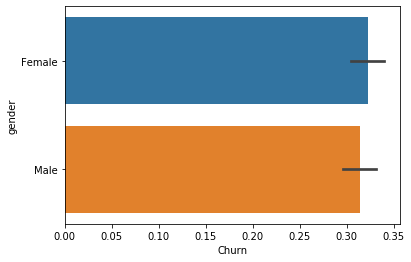

In [1042]:
#And we can drop 
sns.barplot(x='Churn', y='gender', data=frame)

In [1043]:
del frame['gender']

In [1044]:
frame

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,1,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,1,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,Yes,DSL,1.0,0.0,1.0,1.0,1.0,1.0,One year,1,Mailed check,84.80,1990.50,0
7039,0,1,1,72,1,Yes,Fiber optic,0.0,1.0,1.0,0.0,1.0,1.0,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,1,1,11,0,No phone service,DSL,1.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,0,4,1,Yes,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,74.40,306.60,1


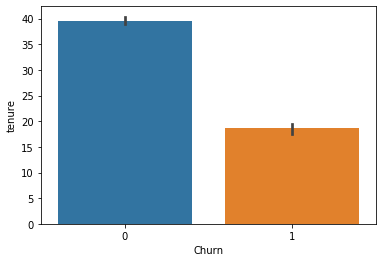

In [1045]:
sns.barplot(x='Churn', y='tenure', data=frame)

In [1046]:
frame.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.018216,-0.207502,0.000371,0.042203,-0.110155,-0.003253,-0.011162,-0.135289,0.034150,0.050055,0.118466,0.129703,0.035950,0.120978
Partner,0.018216,1.000000,0.422281,0.388864,0.021149,0.171581,0.173154,0.187386,0.144021,0.154387,0.146731,-0.017570,0.166292,0.368531,-0.161626
Dependents,-0.207502,0.422281,1.000000,0.175971,-0.029538,0.157478,0.096695,0.084184,0.136108,0.052660,0.025177,-0.090832,-0.014244,0.138261,-0.147970
tenure,0.000371,0.388864,0.175971,1.000000,0.016399,0.377664,0.423038,0.423383,0.374344,0.328069,0.334866,-0.013321,0.372039,0.931935,-0.397735
PhoneService,0.042203,0.021149,-0.029538,0.016399,1.000000,-0.037132,0.014632,-0.005223,-0.040368,0.055687,0.042939,0.086362,0.596436,0.195745,0.055215
OnlineSecurity,-0.110155,0.171581,0.157478,0.377664,-0.037132,1.000000,0.179488,0.170099,0.273270,0.043613,0.056238,-0.139195,0.069771,0.331783,-0.280508
OnlineBackup,-0.003253,0.173154,0.096695,0.423038,0.014632,0.179488,1.000000,0.185021,0.190381,0.146821,0.137064,0.006299,0.252683,0.431750,-0.195758
DeviceProtection,-0.011162,0.187386,0.084184,0.423383,-0.005223,0.170099,0.185021,1.000000,0.235564,0.275900,0.289547,-0.022803,0.322484,0.446978,-0.176806
TechSupport,-0.135289,0.144021,0.136108,0.374344,-0.040368,0.273270,0.190381,0.235564,1.000000,0.161312,0.163271,-0.088187,0.135067,0.354257,-0.274112
StreamingTV,0.034150,0.154387,0.052660,0.328069,0.055687,0.043613,0.146821,0.275900,0.161312,1.000000,0.435338,0.118822,0.533069,0.430234,-0.036698


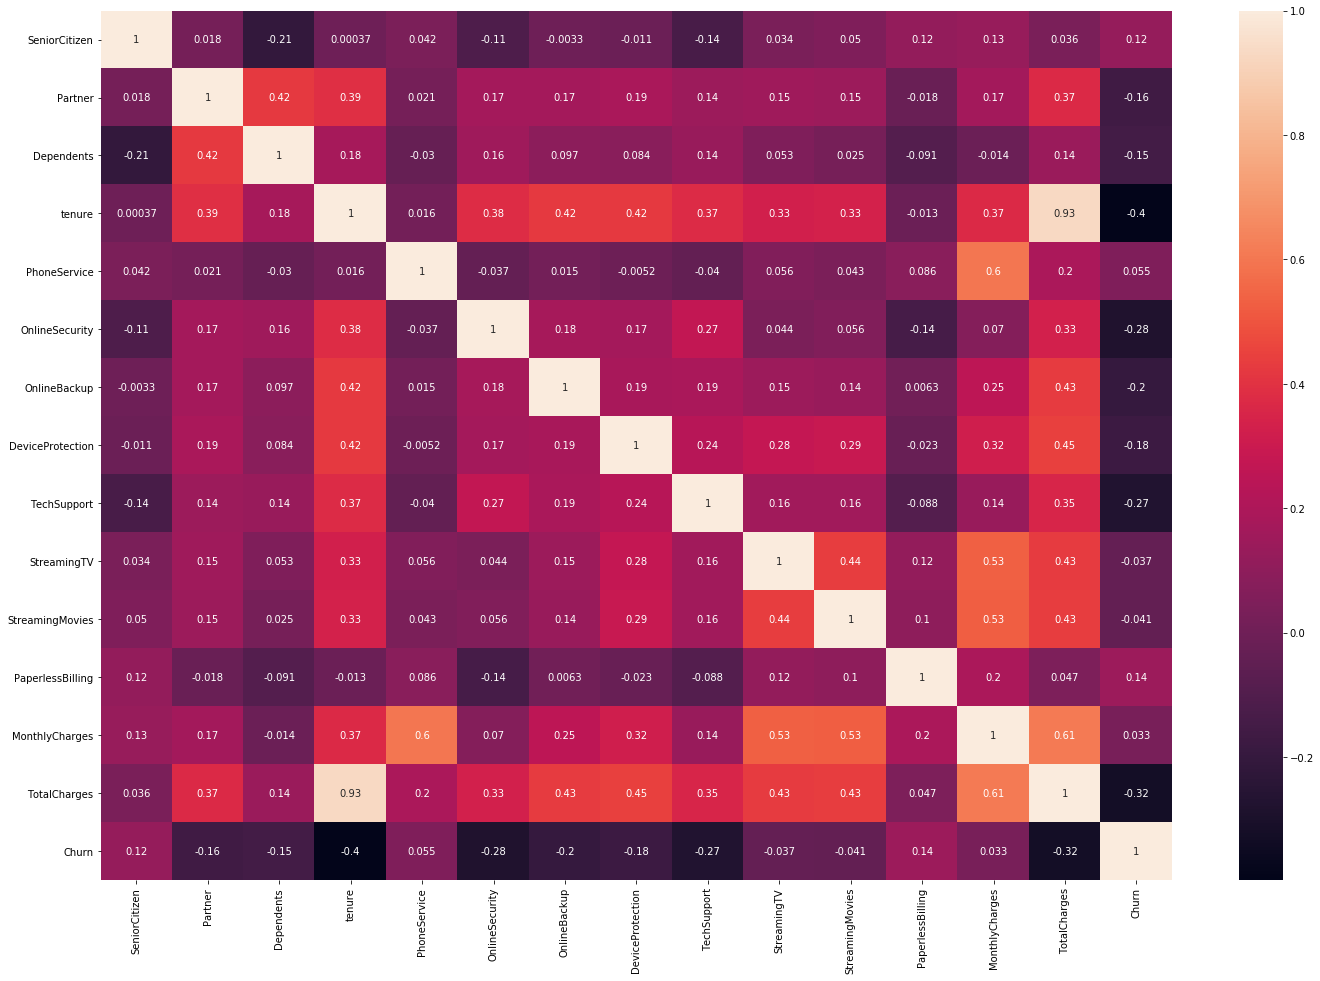

In [1047]:
fig = plt.gcf() 
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 4)
sns.heatmap(frame.corr(),annot = True)
plt.show()

###  We can see that columns MonthlyCharges,PaperlessBilling,PhoneService and SeniorCitizen there was a relatively good correlation

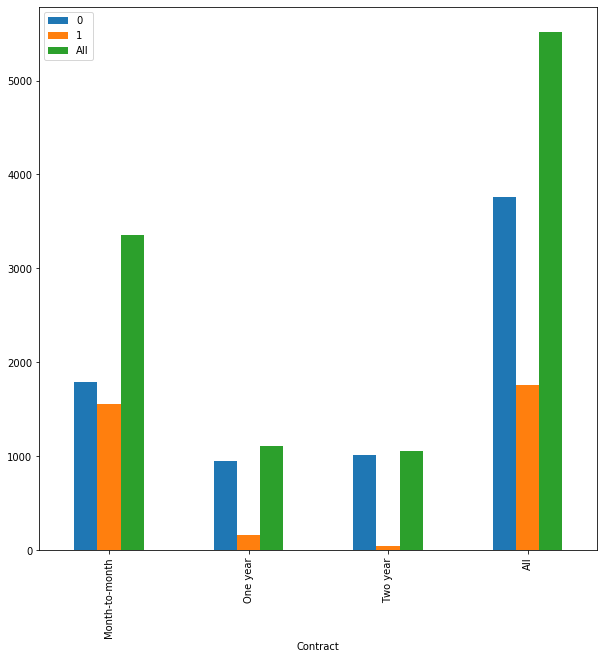

In [1048]:
pd.crosstab(frame['Contract'], frame['Churn'],  margins=True).plot.bar(figsize=(10,10))
plt.legend()
plt.show()
#We can see that plan month-to-month have much Yes

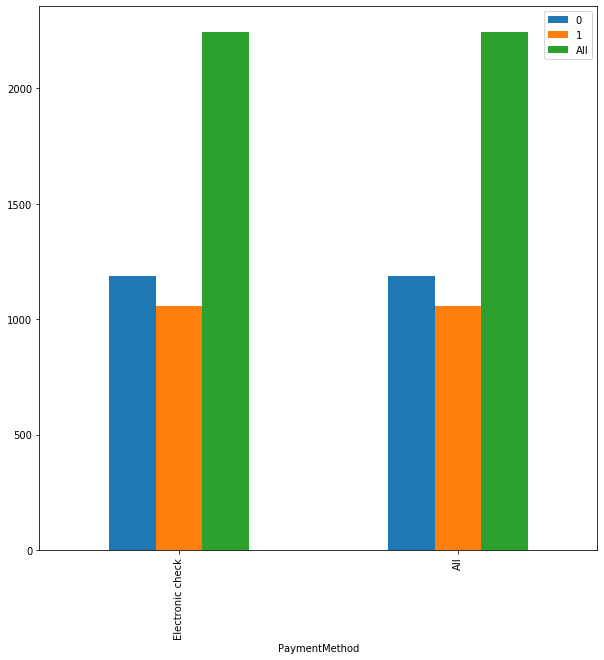

In [1049]:
pd.crosstab(frame[(frame[['PaymentMethod']] == 'Electronic check')]['PaymentMethod'], frame['Churn'],  margins=True).plot.bar(figsize=(10,10))
plt.legend()
plt.show()

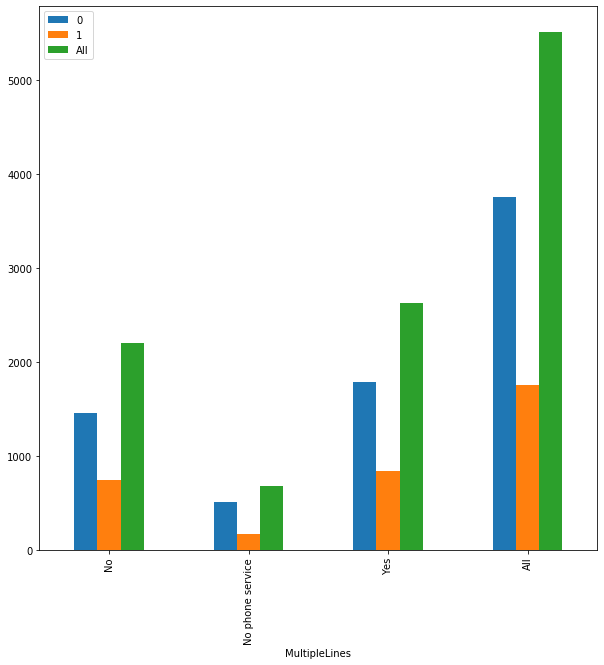

In [1050]:
pd.crosstab(frame['MultipleLines'], frame['Churn'],  margins=True).plot.bar(figsize=(10,10))
plt.legend()
plt.show()
#We can see that plan month-to-month have much Yes

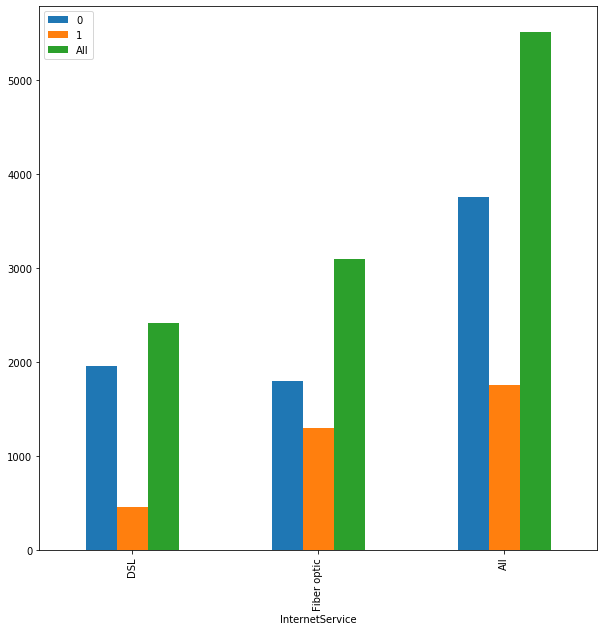

In [1051]:
pd.crosstab(frame['InternetService'], frame['Churn'],  margins=True).plot.bar(figsize=(10,10))
plt.legend()
plt.show()
#We can see that Fiber optic have much Yes

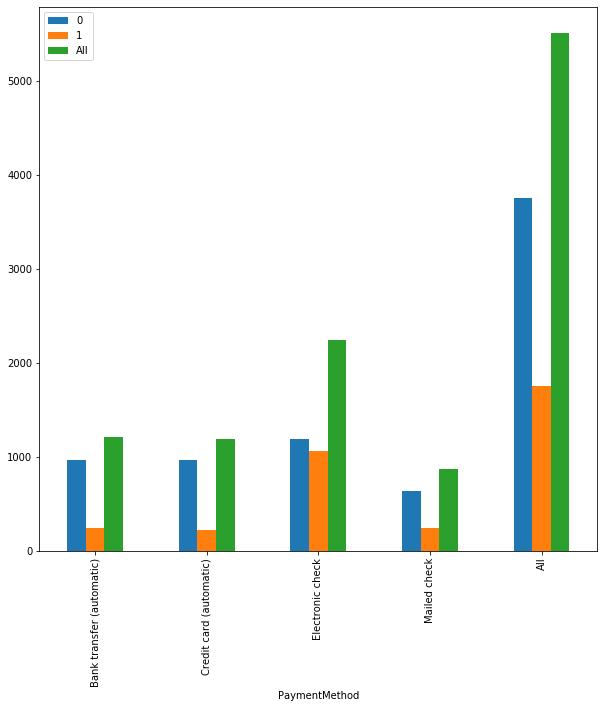

In [1052]:
pd.crosstab(frame['PaymentMethod'], frame['Churn'],  margins=True).plot.bar(figsize=(10,10))
plt.legend()
plt.show()
#We can see that plan Electronic check have much Yes

In [1053]:
frame

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,1,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,1,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,Yes,DSL,1.0,0.0,1.0,1.0,1.0,1.0,One year,1,Mailed check,84.80,1990.50,0
7039,0,1,1,72,1,Yes,Fiber optic,0.0,1.0,1.0,0.0,1.0,1.0,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,1,1,11,0,No phone service,DSL,1.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,0,4,1,Yes,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,74.40,306.60,1


In [1054]:
need_to_sep = ['MultipleLines','InternetService','PaymentMethod']
for i in need_to_sep:
    print(frame[i].unique())

['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [1055]:

phone_service = {'No': 0,'Yes':1}
MultipleLines = frame['MultipleLines'].map(phone_service)
MultipleLines.fillna(0,inplace=True)
MultipleLines.rename('MultipleLines',inplace=True)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7038    1.0
7039    1.0
7040    0.0
7041    1.0
7042    0.0
Name: MultipleLines, Length: 5512, dtype: float64

In [1056]:
frame = frame.assign(MultipleLines=pd.Series(MultipleLines))# append new column to frame 
frame

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0.0,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,1,0.0,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,1,0.0,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,0,0.0,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,0.0,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1.0,DSL,1.0,0.0,1.0,1.0,1.0,1.0,One year,1,Mailed check,84.80,1990.50,0
7039,0,1,1,72,1,1.0,Fiber optic,0.0,1.0,1.0,0.0,1.0,1.0,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,1,1,11,0,0.0,DSL,1.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,0,4,1,1.0,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,74.40,306.60,1


In [1057]:
internet_service = {'DSL': 0,'Fiber optic':1}
InternetService = frame['InternetService'].map(internet_service)
InternetService.fillna(0,inplace=True)
InternetService.rename('InternetService',inplace=True)


0       0
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    0
7041    1
7042    1
Name: InternetService, Length: 5512, dtype: int64

In [1058]:
frame = frame.assign(InternetService=pd.Series(InternetService))# append new column to frame 
frame

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,1,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,1,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,0,0.0,0,1.0,0.0,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1.0,0,1.0,0.0,1.0,1.0,1.0,1.0,One year,1,Mailed check,84.80,1990.50,0
7039,0,1,1,72,1,1.0,1,0.0,1.0,1.0,0.0,1.0,1.0,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,1,1,11,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,0,4,1,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,74.40,306.60,1


In [1059]:
pay = {'Electronic check': 1}
Electronic_check = frame['PaymentMethod'].map(pay)
Electronic_check.fillna(0,inplace=True)
Electronic_check.rename('Electronic check',inplace=True)

0       1.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    1.0
7041    0.0
7042    0.0
Name: Electronic check, Length: 5512, dtype: float64

In [1060]:
frame = frame.assign(Electronic=pd.Series(Electronic_check))# append new column to frame 
frame

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Electronic
0,0,1,0,1,0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0,1.0
1,0,0,0,34,1,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.50,0,0.0
2,0,0,0,2,1,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1,0.0
3,0,0,0,45,0,0.0,0,1.0,0.0,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0.0
4,0,0,0,2,1,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1.0,0,1.0,0.0,1.0,1.0,1.0,1.0,One year,1,Mailed check,84.80,1990.50,0,0.0
7039,0,1,1,72,1,1.0,1,0.0,1.0,1.0,0.0,1.0,1.0,One year,1,Credit card (automatic),103.20,7362.90,0,0.0
7040,0,1,1,11,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.60,346.45,0,1.0
7041,1,1,0,4,1,1.0,1,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,74.40,306.60,1,0.0


In [1061]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     5512 non-null   int64  
 1   Partner           5512 non-null   int64  
 2   Dependents        5512 non-null   int64  
 3   tenure            5512 non-null   int64  
 4   PhoneService      5512 non-null   int64  
 5   MultipleLines     5512 non-null   float64
 6   InternetService   5512 non-null   int64  
 7   OnlineSecurity    5512 non-null   float64
 8   OnlineBackup      5512 non-null   float64
 9   DeviceProtection  5512 non-null   float64
 10  TechSupport       5512 non-null   float64
 11  StreamingTV       5512 non-null   float64
 12  StreamingMovies   5512 non-null   float64
 13  Contract          5512 non-null   object 
 14  PaperlessBilling  5512 non-null   int64  
 15  PaymentMethod     5512 non-null   object 
 16  MonthlyCharges    5512 non-null   float64


In [1062]:
month = {'Month-to-month':1}
Month_to_month = frame[(frame[['Contract']] == 'Month-to-month')]['Contract'].map(month)
Month_to_month.fillna(0,inplace=True)
Month_to_month
Month_to_month.rename('Month-to-month',inplace=True)

0       1.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    1.0
7041    1.0
7042    0.0
Name: Month-to-month, Length: 5512, dtype: float64

In [1063]:
Year = {'One year':1}
Year = frame[(frame[['Contract']] == 'One year')]['Contract'].map(Year)
Year.fillna(0,inplace=True)
Year.rename('Year',inplace=True)

0       0.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
7038    1.0
7039    1.0
7040    0.0
7041    0.0
7042    0.0
Name: Year, Length: 5512, dtype: float64

In [1064]:
Two_Year = {'Two year':1}
Two_Year = frame[(frame[['Contract']] == 'Two year')]['Contract'].map(Two_Year)
Two_Year.fillna(0,inplace=True)
Two_Year.rename('Two Year',inplace=True)

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    0.0
7042    1.0
Name: Two Year, Length: 5512, dtype: float64

In [1065]:
frame = frame.assign(Year=pd.Series(Year))# append new column to frame 
frame

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Electronic,Year
0,0,1,0,1,0,0.0,0,0.0,1.0,0.0,...,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0,1.0,0.0
1,0,0,0,34,1,0.0,0,1.0,0.0,1.0,...,0.0,0.0,One year,0,Mailed check,56.95,1889.50,0,0.0,1.0
2,0,0,0,2,1,0.0,0,1.0,1.0,0.0,...,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1,0.0,0.0
3,0,0,0,45,0,0.0,0,1.0,0.0,1.0,...,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0.0,1.0
4,0,0,0,2,1,0.0,1,0.0,0.0,0.0,...,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1.0,0,1.0,0.0,1.0,...,1.0,1.0,One year,1,Mailed check,84.80,1990.50,0,0.0,1.0
7039,0,1,1,72,1,1.0,1,0.0,1.0,1.0,...,1.0,1.0,One year,1,Credit card (automatic),103.20,7362.90,0,0.0,1.0
7040,0,1,1,11,0,0.0,0,1.0,0.0,0.0,...,0.0,0.0,Month-to-month,1,Electronic check,29.60,346.45,0,1.0,0.0
7041,1,1,0,4,1,1.0,1,0.0,0.0,0.0,...,0.0,0.0,Month-to-month,1,Mailed check,74.40,306.60,1,0.0,0.0


In [1066]:
frame = frame.assign(Year=pd.Series(Year))# append new column to frame 
frame

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Electronic,Year
0,0,1,0,1,0,0.0,0,0.0,1.0,0.0,...,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0,1.0,0.0
1,0,0,0,34,1,0.0,0,1.0,0.0,1.0,...,0.0,0.0,One year,0,Mailed check,56.95,1889.50,0,0.0,1.0
2,0,0,0,2,1,0.0,0,1.0,1.0,0.0,...,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1,0.0,0.0
3,0,0,0,45,0,0.0,0,1.0,0.0,1.0,...,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0.0,1.0
4,0,0,0,2,1,0.0,1,0.0,0.0,0.0,...,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1.0,0,1.0,0.0,1.0,...,1.0,1.0,One year,1,Mailed check,84.80,1990.50,0,0.0,1.0
7039,0,1,1,72,1,1.0,1,0.0,1.0,1.0,...,1.0,1.0,One year,1,Credit card (automatic),103.20,7362.90,0,0.0,1.0
7040,0,1,1,11,0,0.0,0,1.0,0.0,0.0,...,0.0,0.0,Month-to-month,1,Electronic check,29.60,346.45,0,1.0,0.0
7041,1,1,0,4,1,1.0,1,0.0,0.0,0.0,...,0.0,0.0,Month-to-month,1,Mailed check,74.40,306.60,1,0.0,0.0


In [1067]:
frame = frame.assign(Year=pd.Series(Year))# append new column to frame 
frame

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Electronic,Year
0,0,1,0,1,0,0.0,0,0.0,1.0,0.0,...,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0,1.0,0.0
1,0,0,0,34,1,0.0,0,1.0,0.0,1.0,...,0.0,0.0,One year,0,Mailed check,56.95,1889.50,0,0.0,1.0
2,0,0,0,2,1,0.0,0,1.0,1.0,0.0,...,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1,0.0,0.0
3,0,0,0,45,0,0.0,0,1.0,0.0,1.0,...,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0.0,1.0
4,0,0,0,2,1,0.0,1,0.0,0.0,0.0,...,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1.0,0,1.0,0.0,1.0,...,1.0,1.0,One year,1,Mailed check,84.80,1990.50,0,0.0,1.0
7039,0,1,1,72,1,1.0,1,0.0,1.0,1.0,...,1.0,1.0,One year,1,Credit card (automatic),103.20,7362.90,0,0.0,1.0
7040,0,1,1,11,0,0.0,0,1.0,0.0,0.0,...,0.0,0.0,Month-to-month,1,Electronic check,29.60,346.45,0,1.0,0.0
7041,1,1,0,4,1,1.0,1,0.0,0.0,0.0,...,0.0,0.0,Month-to-month,1,Mailed check,74.40,306.60,1,0.0,0.0


In [1068]:
frame = frame.assign(Year=pd.Series(Year))# append new column to frame 
frame

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Electronic,Year
0,0,1,0,1,0,0.0,0,0.0,1.0,0.0,...,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0,1.0,0.0
1,0,0,0,34,1,0.0,0,1.0,0.0,1.0,...,0.0,0.0,One year,0,Mailed check,56.95,1889.50,0,0.0,1.0
2,0,0,0,2,1,0.0,0,1.0,1.0,0.0,...,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1,0.0,0.0
3,0,0,0,45,0,0.0,0,1.0,0.0,1.0,...,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0.0,1.0
4,0,0,0,2,1,0.0,1,0.0,0.0,0.0,...,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1.0,0,1.0,0.0,1.0,...,1.0,1.0,One year,1,Mailed check,84.80,1990.50,0,0.0,1.0
7039,0,1,1,72,1,1.0,1,0.0,1.0,1.0,...,1.0,1.0,One year,1,Credit card (automatic),103.20,7362.90,0,0.0,1.0
7040,0,1,1,11,0,0.0,0,1.0,0.0,0.0,...,0.0,0.0,Month-to-month,1,Electronic check,29.60,346.45,0,1.0,0.0
7041,1,1,0,4,1,1.0,1,0.0,0.0,0.0,...,0.0,0.0,Month-to-month,1,Mailed check,74.40,306.60,1,0.0,0.0


In [1069]:
frame = frame.assign(Two_Year=pd.Series(Two_Year))
frame

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Electronic,Year,Two_Year
0,0,1,0,1,0,0.0,0,0.0,1.0,0.0,...,0.0,Month-to-month,1,Electronic check,29.85,29.85,0,1.0,0.0,0.0
1,0,0,0,34,1,0.0,0,1.0,0.0,1.0,...,0.0,One year,0,Mailed check,56.95,1889.50,0,0.0,1.0,0.0
2,0,0,0,2,1,0.0,0,1.0,1.0,0.0,...,0.0,Month-to-month,1,Mailed check,53.85,108.15,1,0.0,0.0,0.0
3,0,0,0,45,0,0.0,0,1.0,0.0,1.0,...,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0.0,1.0,0.0
4,0,0,0,2,1,0.0,1,0.0,0.0,0.0,...,0.0,Month-to-month,1,Electronic check,70.70,151.65,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1.0,0,1.0,0.0,1.0,...,1.0,One year,1,Mailed check,84.80,1990.50,0,0.0,1.0,0.0
7039,0,1,1,72,1,1.0,1,0.0,1.0,1.0,...,1.0,One year,1,Credit card (automatic),103.20,7362.90,0,0.0,1.0,0.0
7040,0,1,1,11,0,0.0,0,1.0,0.0,0.0,...,0.0,Month-to-month,1,Electronic check,29.60,346.45,0,1.0,0.0,0.0
7041,1,1,0,4,1,1.0,1,0.0,0.0,0.0,...,0.0,Month-to-month,1,Mailed check,74.40,306.60,1,0.0,0.0,0.0


In [1070]:
frame = frame.assign(Month_to_month=pd.Series(Month_to_month))
frame

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Electronic,Year,Two_Year,Month_to_month
0,0,1,0,1,0,0.0,0,0.0,1.0,0.0,...,Month-to-month,1,Electronic check,29.85,29.85,0,1.0,0.0,0.0,1.0
1,0,0,0,34,1,0.0,0,1.0,0.0,1.0,...,One year,0,Mailed check,56.95,1889.50,0,0.0,1.0,0.0,0.0
2,0,0,0,2,1,0.0,0,1.0,1.0,0.0,...,Month-to-month,1,Mailed check,53.85,108.15,1,0.0,0.0,0.0,1.0
3,0,0,0,45,0,0.0,0,1.0,0.0,1.0,...,One year,0,Bank transfer (automatic),42.30,1840.75,0,0.0,1.0,0.0,0.0
4,0,0,0,2,1,0.0,1,0.0,0.0,0.0,...,Month-to-month,1,Electronic check,70.70,151.65,1,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1.0,0,1.0,0.0,1.0,...,One year,1,Mailed check,84.80,1990.50,0,0.0,1.0,0.0,0.0
7039,0,1,1,72,1,1.0,1,0.0,1.0,1.0,...,One year,1,Credit card (automatic),103.20,7362.90,0,0.0,1.0,0.0,0.0
7040,0,1,1,11,0,0.0,0,1.0,0.0,0.0,...,Month-to-month,1,Electronic check,29.60,346.45,0,1.0,0.0,0.0,1.0
7041,1,1,0,4,1,1.0,1,0.0,0.0,0.0,...,Month-to-month,1,Mailed check,74.40,306.60,1,0.0,0.0,0.0,1.0


In [1071]:
frame
del frame['Contract']
del frame['PaymentMethod']


In [1072]:
current = []
for i in frame.corr():
    if frame[i].corr(frame['Churn']) > 0.1:
        current.append(i)
        print(frame[i].corr(frame['Churn']))

0.1209784523052439
0.24381114181362734
0.14298741364853051
1.0
0.2706226652468635
0.3895707910421375


In [1073]:
current

['SeniorCitizen',
 'InternetService',
 'PaperlessBilling',
 'Churn',
 'Electronic',
 'Month_to_month']

In [1074]:
New_Frame = pd.DataFrame()

In [1075]:
for i in current:
    New_Frame[i] = frame[i]

In [1076]:
New_Frame

,SeniorCitizen,InternetService,PaperlessBilling,Churn,Electronic,Month_to_month
0,0,0,1,0,1.0,1.0
1,0,0,0,0,0.0,0.0
2,0,0,1,1,0.0,1.0
3,0,0,0,0,0.0,0.0
4,0,1,1,1,1.0,1.0
...,...,...,...,...,...,...
7038,0,0,1,0,0.0,0.0
7039,0,1,1,0,0.0,0.0
7040,0,0,1,0,1.0,1.0
7041,1,1,1,1,0.0,1.0


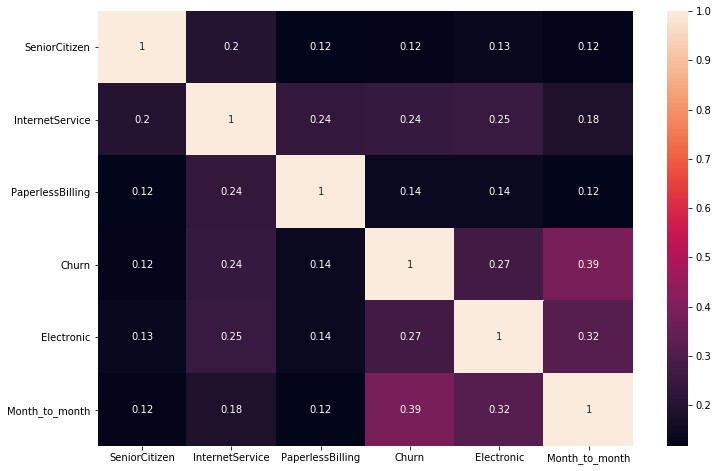

In [1077]:
fig = plt.gcf() 
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
sns.heatmap(New_Frame.corr(),annot = True)
plt.show()

In [1078]:
New_Frame.describe()

,SeniorCitizen,InternetService,PaperlessBilling,Churn,Electronic,Month_to_month
count,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000,5512.000000
mean,0.197750,0.561684,0.675435,0.318578,0.406930,0.607946
std,0.398339,0.496226,0.468254,0.465967,0.491306,0.488253
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
